In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
df=pd.read_excel('/content/ncr_ride_bookings.xlsx')
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [16]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,150000,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,2024-06-30 16:42:40.320000,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
min,2024-01-01 00:00:00,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,2024-03-31 00:00:00,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,2024-07-01 00:00:00,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,2024-09-30 00:00:00,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,2024-12-30 00:00:00,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000
std,NaN,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819


In [17]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


In [18]:
df_clean=df.copy()

In [19]:
group_means1 = df_clean.groupby(['Vehicle Type','Pickup Location'])['Avg VTAT'].transform('mean')
overall_mean1 = df_clean['Avg VTAT'].mean()
df_clean['Avg VTAT'].fillna(group_means1, inplace=True)
df_clean['Avg VTAT'].fillna(overall_mean1, inplace=True)

/tmp/ipython-input-2524038468.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Avg VTAT'].fillna(group_means1, inplace=True)
/tmp/ipython-input-2524038468.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [20]:
group_means2 = df_clean.groupby(['Pickup Location'])['Avg CTAT'].transform('mean')
overall_mean2 = df_clean['Avg CTAT'].mean()
df_clean['Avg CTAT'].fillna(group_means2, inplace=True)
df_clean['Avg CTAT'].fillna(overall_mean2, inplace=True)

/tmp/ipython-input-290724314.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Avg CTAT'].fillna(group_means2, inplace=True)
/tmp/ipython-input-290724314.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [21]:
group_means_booking = df_clean.groupby(['Pickup Location', 'Drop Location'])['Booking Value'].transform('mean')
overall_mean_booking = df_clean['Booking Value'].mean()
df_clean['Booking Value'] = df_clean['Booking Value'].fillna(group_means_booking)
df_clean['Booking Value'] = df_clean['Booking Value'].fillna(overall_mean_booking)

In [22]:
group_means_distance = df_clean.groupby(['Pickup Location', 'Drop Location'])['Ride Distance'].transform('mean')
overall_mean_distance = df_clean['Ride Distance'].mean()
df_clean['Ride Distance'] = df_clean['Ride Distance'].fillna(group_means_distance)
df_clean['Ride Distance'] = df_clean['Ride Distance'].fillna(overall_mean_distance)

In [23]:
group_means_driver = df_clean.groupby(['Vehicle Type'])['Driver Ratings'].transform('mean')
overall_mean_driver = df_clean['Driver Ratings'].mean()
df_clean['Driver Ratings'] = df_clean['Driver Ratings'].fillna(group_means_driver)
df_clean['Driver Ratings'] = df_clean['Driver Ratings'].fillna(overall_mean_driver)

In [24]:
group_means_customer = df_clean.groupby(['Vehicle Type','Customer ID'])['Customer Rating'].transform('mean')
overall_mean_customer = df_clean['Customer Rating'].mean()
df_clean['Customer Rating'] = df_clean['Customer Rating'].fillna(group_means_customer)
df_clean['Customer Rating'] = df_clean['Customer Rating'].fillna(overall_mean_customer)

In [25]:
group_mode_payment = df_clean.groupby(['Pickup Location', 'Drop Location','Customer ID'])['Payment Method'].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
overall_mode_payment = df_clean['Payment Method'].mode()[0]
df_clean['Payment Method'] = df_clean['Payment Method'].fillna(group_mode_payment)
df_clean['Payment Method'] = df_clean['Payment Method'].fillna(overall_mode_payment)


In [26]:
df_clean.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,0
Avg CTAT,0


In [27]:

total_rides = len(df_clean)
customer_cancel = df_clean["Cancelled Rides by Customer"].notnull().sum()
driver_cancel = df_clean["Cancelled Rides by Driver"].notnull().sum()
incomplete_rides = df_clean["Incomplete Rides"].notnull().sum()
completed_rides = total_rides - (customer_cancel + driver_cancel + incomplete_rides)
avg_distance = df_clean["Ride Distance"].mean()
avg_booking_value = df_clean["Booking Value"].mean()
avg_vtat = df_clean["Avg VTAT"].mean()
avg_ctat = df_clean["Avg CTAT"].mean()
completed_ratio = (completed_rides / total_rides) * 100
customer_cancel_ratio = (customer_cancel / total_rides) * 100
driver_cancel_ratio = (driver_cancel / total_rides) * 100
incomplete_ratio = (incomplete_rides / total_rides) * 100
print("📊 Key KPIs from the Dataset")
print("-"*40)
print(f"Total Rides                : {total_rides}")
print(f"Completed Rides            : {completed_rides} ({completed_ratio:.2f}%)")
print(f"Customer Cancellations     : {customer_cancel} ({customer_cancel_ratio:.2f}%)")
print(f"Driver Cancellations       : {driver_cancel} ({driver_cancel_ratio:.2f}%)")
print(f"Incomplete Rides           : {incomplete_rides} ({incomplete_ratio:.2f}%)")
print("-"*40)
print(f"Average Ride Distance (km) : {avg_distance:.2f}")
print(f"Average Booking Value      : {avg_booking_value:.2f}")
print(f"Average VTAT (min)         : {avg_vtat:.2f}")
print(f"Average CTAT (min)         : {avg_ctat:.2f}")

📊 Key KPIs from the Dataset
----------------------------------------
Total Rides                : 150000
Completed Rides            : 103500 (69.00%)
Customer Cancellations     : 10500 (7.00%)
Driver Cancellations       : 27000 (18.00%)
Incomplete Rides           : 9000 (6.00%)
----------------------------------------
Average Ride Distance (km) : 24.66
Average Booking Value      : 507.76
Average VTAT (min)         : 8.46
Average CTAT (min)         : 29.15


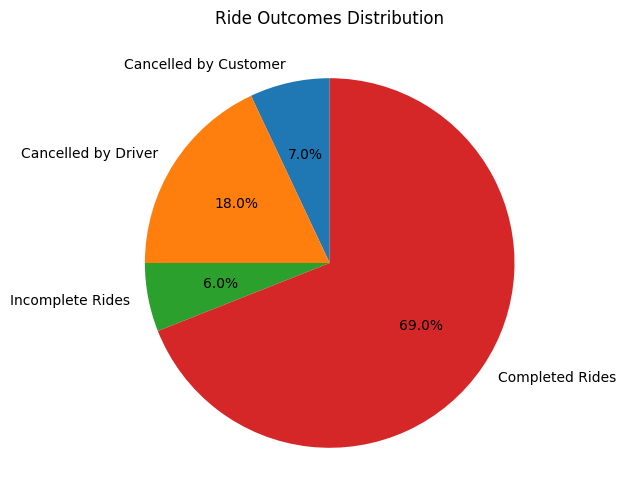

In [28]:

labels = ["Cancelled by Customer", "Cancelled by Driver", "Incomplete Rides", "Completed Rides"]
values = [customer_cancel, driver_cancel, incomplete_rides, completed_rides]

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Ride Outcomes Distribution")
plt.show()



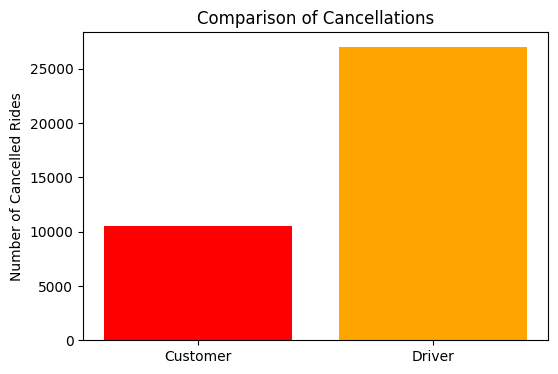

In [29]:
plt.figure(figsize=(6,4))
plt.bar(["Customer", "Driver"], [customer_cancel, driver_cancel], color=['red','orange'])
plt.title("Comparison of Cancellations")
plt.ylabel("Number of Cancelled Rides")
plt.show()


<Axes: ylabel='Reason for cancelling by Customer'>

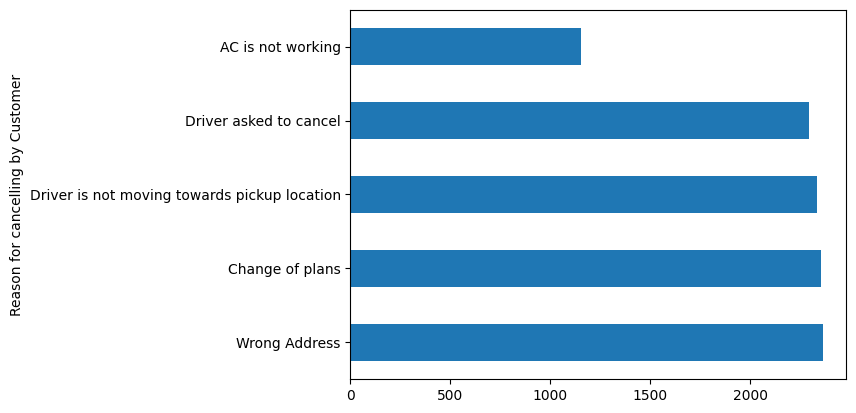

In [30]:
df['Reason for cancelling by Customer'].value_counts().plot(kind='barh')

<Axes: ylabel='Driver Cancellation Reason'>

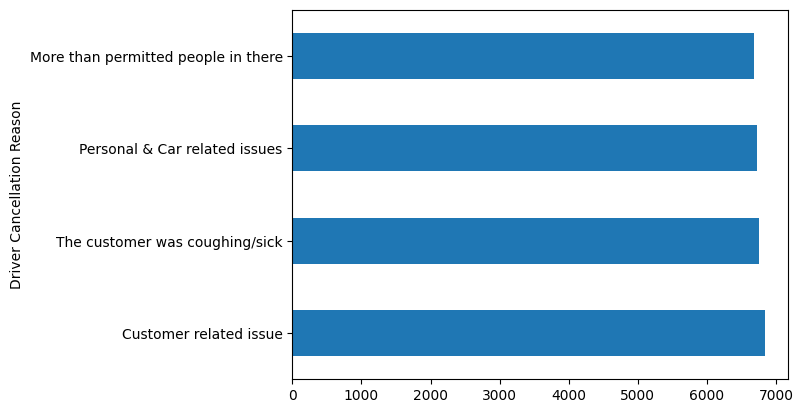

In [31]:
df['Driver Cancellation Reason'].value_counts().plot(kind='barh')

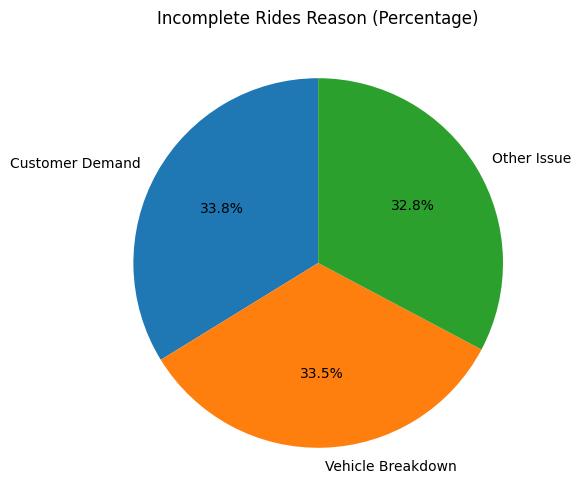

In [32]:
incomplete_reasons = df['Incomplete Rides Reason'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,6))
plt.pie(incomplete_reasons, labels=incomplete_reasons.index, autopct='%1.1f%%', startangle=90)
plt.title('Incomplete Rides Reason (Percentage)')
plt.show()

Does ride distance influence driver cancellations?

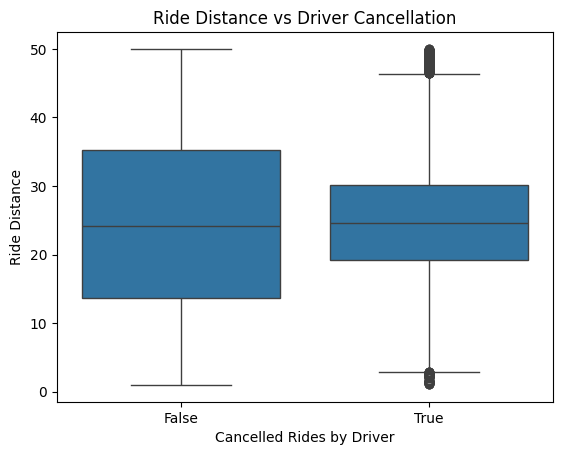

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df_clean["Cancelled Rides by Driver"].notnull(), y=df_clean["Ride Distance"])
plt.title("Ride Distance vs Driver Cancellation")
plt.show()

Does booking value influence customer cancellations?

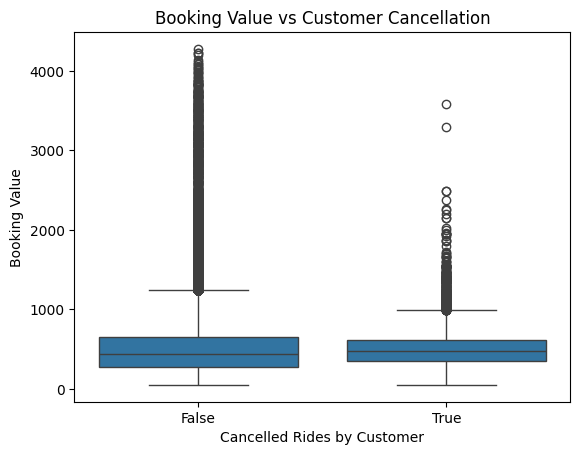

In [34]:
sns.boxplot(x=df_clean["Cancelled Rides by Customer"].notnull(), y=df_clean["Booking Value"])
plt.title("Booking Value vs Customer Cancellation")
plt.show()

Is there a relationship between ride distance and driver cancellations?

In [35]:
import scipy.stats as stats
driver_cancelled = df_clean.loc[df_clean["Cancelled Rides by Driver"].notnull(),"Ride Distance"].dropna()
not_driver_cancelled = df_clean.loc[df_clean["Cancelled Rides by Driver"].isnull(),"Ride Distance"].dropna()
stat,p=stats.mannwhitneyu(driver_cancelled,not_driver_cancelled,alternative="two-sided")
print("Mann-Whitney U test p-value:",p)

Mann-Whitney U test p-value: 3.038754421237328e-07


Is customer rating related to vehicle type?

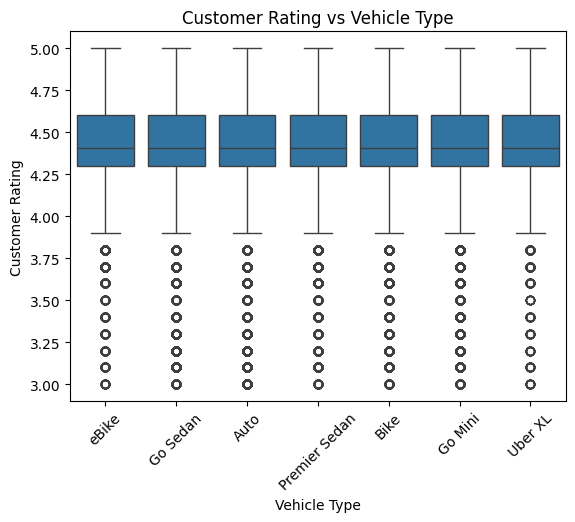

In [36]:
sns.boxplot(x=df_clean["Vehicle Type"], y=df_clean["Customer Rating"])
plt.title("Customer Rating vs Vehicle Type")
plt.xticks(rotation=45)
plt.show()

Relationship between VTAT and driver cancellations

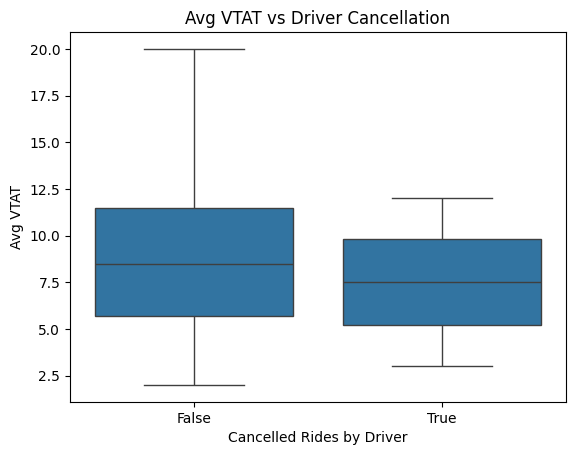

In [37]:
sns.boxplot(x=df_clean["Cancelled Rides by Driver"].notnull(), y=df_clean["Avg VTAT"])
plt.title("Avg VTAT vs Driver Cancellation")
plt.show()

Relationship between CTAT and customer cancellations

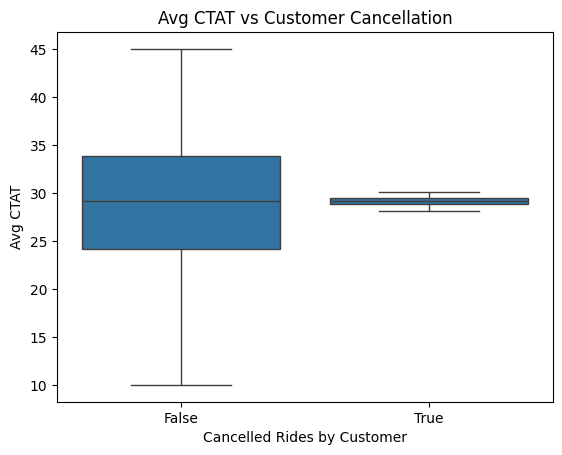

In [38]:
sns.boxplot(x=df_clean["Cancelled Rides by Customer"].notnull(), y=df_clean["Avg CTAT"])
plt.title("Avg CTAT vs Customer Cancellation")
plt.show()

Relationship between driver rating and booking value

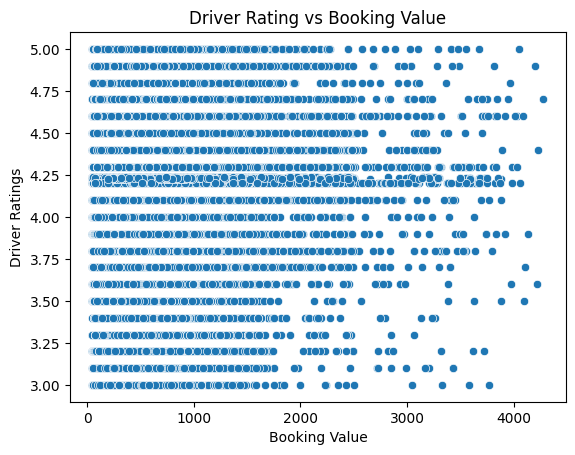

In [39]:
sns.scatterplot(x=df_clean["Booking Value"], y=df_clean["Driver Ratings"])
plt.title("Driver Rating vs Booking Value")
plt.show()

Does booking time (hour of day) influence cancellation rates?

In [40]:
df_clean.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

/tmp/ipython-input-4101605953.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean["Time"] = pd.to_datetime(df_clean["Time"])


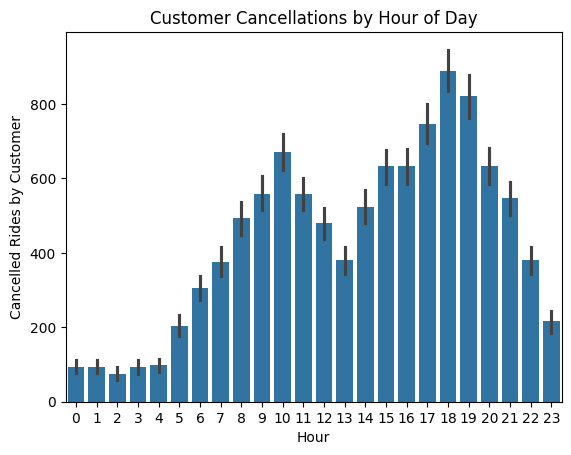

In [41]:
df_clean["Time"] = df_clean["Time"].astype(str)
df_clean["Time"] = pd.to_datetime(df_clean["Time"])
df_clean["Hour"] = df_clean["Time"].dt.hour
sns.barplot(x="Hour", y=df_clean["Cancelled Rides by Customer"].notnull(), data=df_clean, estimator=sum)
plt.title("Customer Cancellations by Hour of Day")
plt.show()

Is vehicle type associated with driver cancellations?

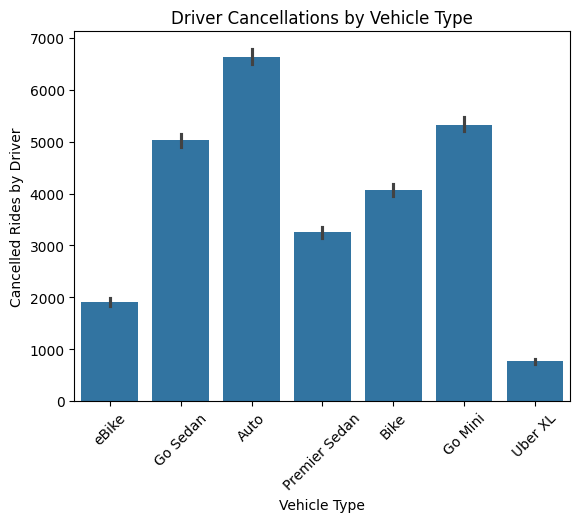

In [42]:
sns.barplot(x="Vehicle Type", y=df_clean["Cancelled Rides by Driver"].notnull(), data=df_clean, estimator=sum)
plt.title("Driver Cancellations by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

Does trip duration relate to cancellations?

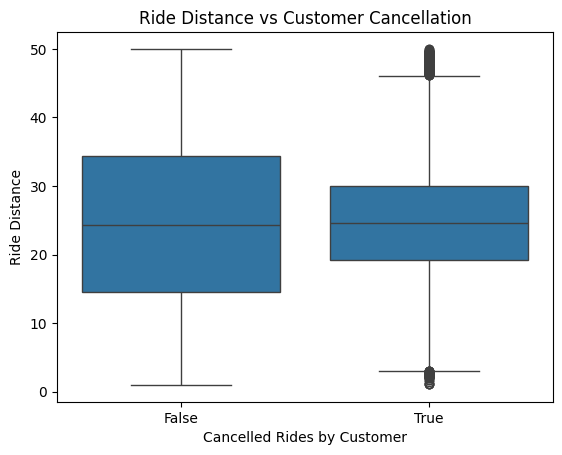

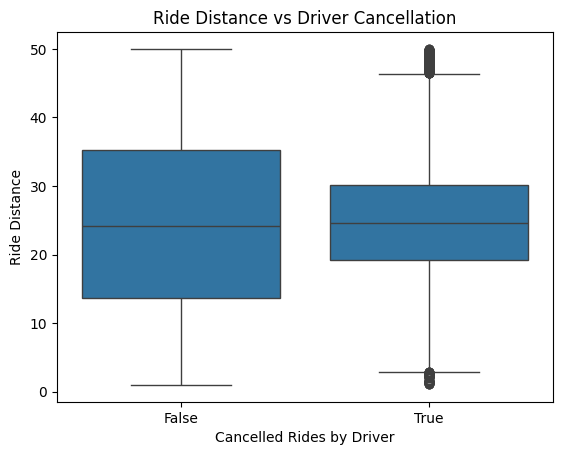

In [43]:
import seaborn as sns
sns.boxplot(x=df_clean["Cancelled Rides by Customer"].notnull(), y=df_clean["Ride Distance"])
plt.title("Ride Distance vs Customer Cancellation")
plt.show()
sns.boxplot(x=df_clean["Cancelled Rides by Driver"].notnull(), y=df_clean["Ride Distance"])
plt.title("Ride Distance vs Driver Cancellation")
plt.show()

Are pickup locations associated with cancellations?

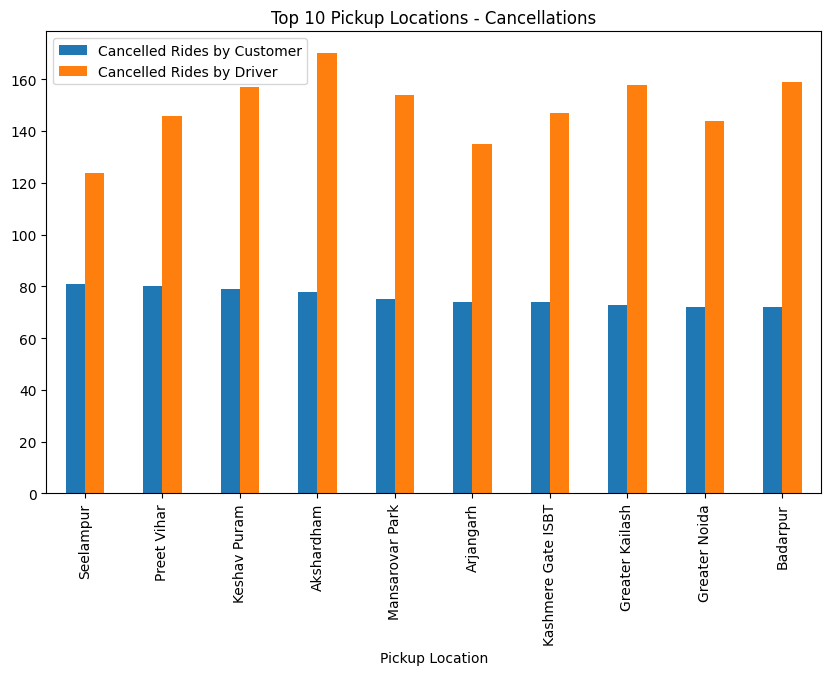

In [44]:
pickup_cancel = df_clean.groupby("Pickup Location")[["Cancelled Rides by Customer","Cancelled Rides by Driver"]].count().sort_values("Cancelled Rides by Customer",ascending=False).head(10)
pickup_cancel.plot(kind="bar", figsize=(10,6))
plt.title("Top 10 Pickup Locations - Cancellations")
plt.show()

Do ratings differ between completed and cancelled rides?

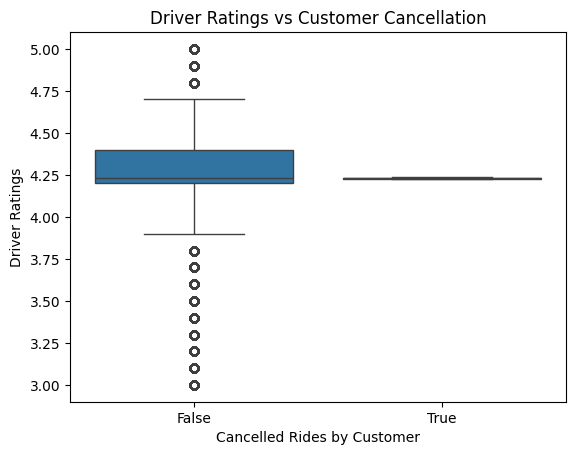

In [45]:
sns.boxplot(x=df_clean["Cancelled Rides by Customer"].notnull(), y=df_clean["Driver Ratings"])
plt.title("Driver Ratings vs Customer Cancellation")
plt.show()